In [71]:
import os
import pathlib
import pandas as pd
import re

import copy
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

import analysis
%load_ext autoreload
%autoreload 2

# Définir le répertoire racine où vous souhaitez chercher des fichiers .csv
root_directory = [
    "/volatile/home/pj273170/Code/Breaching/breaching/outputs/mask/2023-04-17",
    # "/volatile/home/pj273170/Code/Breaching/breaching/outputs/mask/2023-04-24",
    # "/volatile/home/pj273170/Code/Breaching/breaching/outputs/no_mask/2023-11-30",
    "/volatile/home/pj273170/Code/Breaching/breaching/outputs/no_mask/2023-12-01/14-31-11",
    # "/volatile/home/pj273170/Code/Breaching/breaching/outputs/no_mask/2023-12-01/14-25-12",
    # "/volatile/home/pj273170/Code/Breaching/breaching/outputs/no_mask/2023-12-04/10-54-39",
]

root_directory_1 = [
    "/volatile/home/pj273170/Code/Breaching/breaching/outputs/no_mask/2023-12-04/10-54-39",
    # "/volatile/home/pj273170/Code/Breaching/breaching/outputs/no_mask/2023-11-30",
]

# root_directory = os.getcwd() + "/outputs/no_mask/2023-06-14/14-56-43/5"
# Créer une liste vide pour stocker tous les DataFrames des fichiers .csv trouvés

# Parcourir tous les fichiers du répertoire racine et des sous-répertoires de manière récursive
def get_data_frame(root_directory, if_break = False):
    data_frames = []
    conv_frames = []
    for subdir, dirs, files in os.walk(root_directory):
        for file in files:
            # Vérifier si le fichier est un fichier .csv
            if file.endswith('reports.csv'):
                # Ouvrir le fichier .csv dans un DataFrame
                file_path = os.path.join(subdir, file)
                df = pd.read_csv(file_path, sep='\t')
                df["file_path"] = file_path
                # Ajouter le DataFrame à la listeZ

                for subdir_log, _, file_logs in os.walk(pathlib.Path(subdir).parent):
                    for file_log in file_logs:
                        if file_log.endswith('.log'):
                            # Extract a, b, c from log file
                            file_path_log = os.path.join(subdir_log, file_log)
                            a, b, c = (analysis.get_paired_from_log(file_path_log))
                            # print(log_file.read())
                            df["num_data_points"] = a
                            df["num_data_per_local_update_step"] = b
                            df["num_local_updates"] = c

                            # Extract load round from log file
                            load_round = analysis.get_load_round_from_log(file_path_log)
                            df["load_round"] = load_round

                            # Extract Iterations, and Reconstruction Losses from log file
                            user, trials, it_rec_pairs_matches = analysis.get_iteration_and_rec_loss_from_log(file_path_log)
                            second_time = False
                            for it, _ in it_rec_pairs_matches:
                                df[f"it_{it}"] = None
                            trial = 0
                            max_it = max([it for it, _ in it_rec_pairs_matches])
                            for it, rec_loss in it_rec_pairs_matches:
                                df.loc[df.index == trial, f"it_{it}"] = rec_loss
                                if it == max_it:
                                    trial += 1
                            if if_break:
                                break
                    if if_break:
                        break
                data_frames.append(df)
            elif file.endswith('convergence_results.csv'):
                file_path = os.path.join(subdir, file)
                df = pd.read_csv(file_path, sep='\t')
                df["file_path"] = file_path
                conv_frames.append(df)
            if if_break:
                break
        if if_break:
            break
    return data_frames, conv_frames

if_break = False
if type(root_directory) == str:
    root_directory = [root_directory]

def get_data_frames_from_root_list(root_directory, if_break=False):
    if type(root_directory) == list:
        data_frames_list = []
        conv_frames_list = []
        for root_directory_i in root_directory:
            data_frame, conv_frame = get_data_frame(root_directory_i, if_break=if_break)
            if data_frame != []:
                data_frames_list.append(pd.concat(data_frame, ignore_index=True))
            if conv_frame != []:
                conv_frames_list.append(pd.concat(conv_frame, ignore_index=True))
        # if data_frames_list != []:
        merged_df = pd.concat(data_frames_list, ignore_index=True)
        if conv_frames_list != []:
            conv_df = pd.concat(conv_frames_list, ignore_index=True)
        else:
            conv_df = None
    else:
        raise ValueError("root_directory must be a str or a list of str")
    return copy.deepcopy(merged_df), copy.deepcopy(conv_df)

if root_directory != []:
    merged_df, conv_df = get_data_frames_from_root_list(root_directory, if_break=if_break)
    print(merged_df.shape)
if root_directory_1 != []:
    merged_df_1, conv_df_1 = get_data_frames_from_root_list(root_directory_1, if_break=if_break)
    print(merged_df_1.shape)
# merged_df_2, conv_df_2 = get_data_frames_from_root_list(root_directory_2, if_break=if_break)

# Fusionner tous les DataFrames en un seul DataFrame
# merged_df = pd.concat(data_frames, ignore_index=True)
# conv_df = pd.concat(conv_frames, ignore_index=True)
# path = "2023-06-22/14-53-34/0"
# date = "2023-06-22"
# hour = "14-53-34"
# run = "0"
# date_and_run = f"{date}/{hour}/{run}"
# print(date_and_run)
# filtered_conv_df = conv_df[conv_df["file_path"].str.contains(date_and_run)]

# # Afficher le DataFrame résultant

# print(merged_df_2.shape)
# print(filtered_conv_df.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(390, 337)
(30, 325)


In [16]:
print(merged_df.columns[:60])

Index(['name', 'usecase', 'model', 'datapoints', 'model_state', 'attack',
       'attacktype', 'mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'max_ssim',
       'max_rpsnr', 'IIP-pixel', 'IIP-lpips', 'IIP-self', 'feat_mse',
       'parameters', 'label_acc', 'queries', 'score', 'total_time',
       'user_type', 'gradient_noise', 'seed', 'ATK_type', 'ATK_attack_type',
       'ATK_label_strategy', 'ATK_text_strategy', 'ATK_token_recovery',
       'ATK_objective', 'ATK_restarts', 'ATK_init', 'ATK_normalize_gradients',
       'ATK_optim', 'ATK_augmentations', 'ATK_differentiable_augmentations',
       'ATK_regularization', 'ATK_impl', 'data', 'impl', 'server', 'user',
       'num_queries', 'folder', 'file_path', 'num_data_points',
       'num_data_per_local_update_step', 'num_local_updates', 'load_round',
       'it_1', 'it_101', 'it_201', 'it_301', 'it_401', 'it_501', 'it_601',
       'it_701', 'it_801'],
      dtype='object')


In [67]:
def eval_str(x):
    if type(x) == str:
        return eval(x)
    else:
        return x
merged_df = merged_df.apply(eval_str)

my_dict = eval(merged_df["user"].iloc[0])
pd.json_normalize(my_dict)

,user_type,user_idx,num_data_points,provide_buffers,provide_labels,provide_num_data_points,local_diff_privacy.gradient_noise,local_diff_privacy.input_noise,local_diff_privacy.distribution,local_diff_privacy.per_example_clipping
0,local_gradient,0,64,False,True,True,0.0,0.0,laplacian,0.0


In [40]:
merged_df = merged_df.apply(lambda x: eval(x) if type(x) == str else x, axis=1)

datapoints [ 64  32   2   8  16   4 128   1]
model ['custom_McMahan_32_32']
num_local_updates [ 0  1  8 32 16  4]
load_round [0]
ATK_type ['deep-leakage']
user_type ['local_gradient' 'local_update']


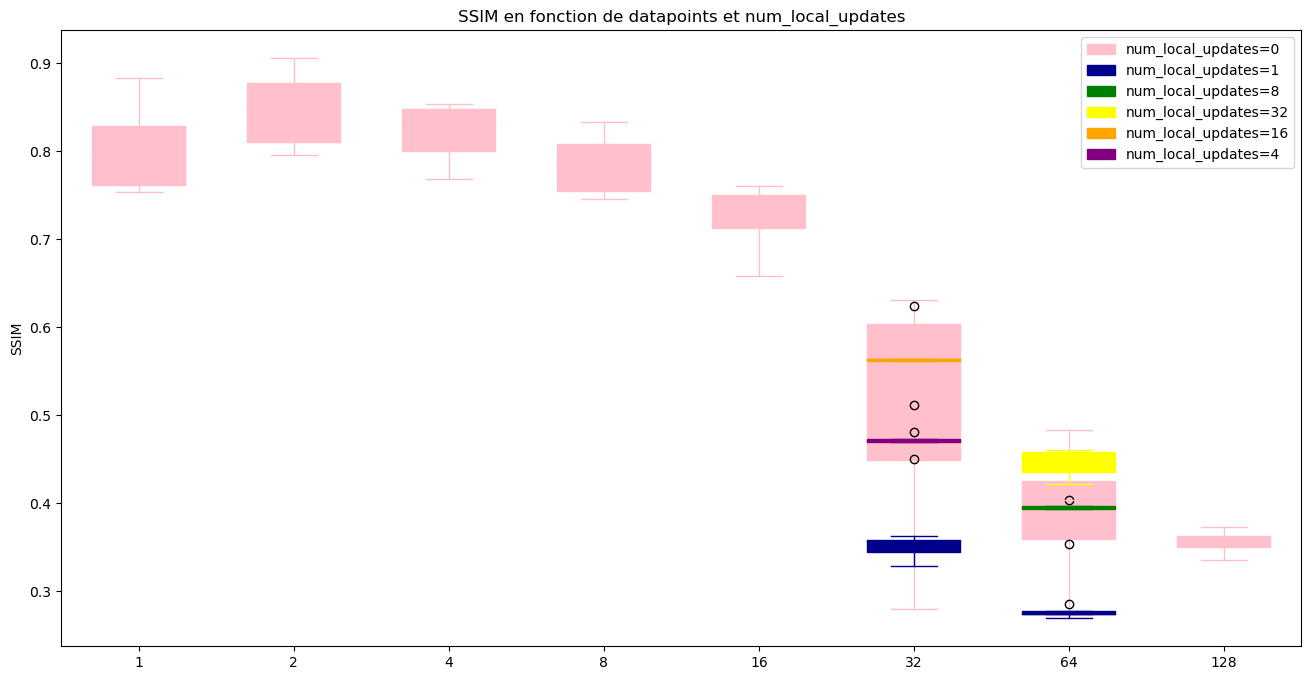

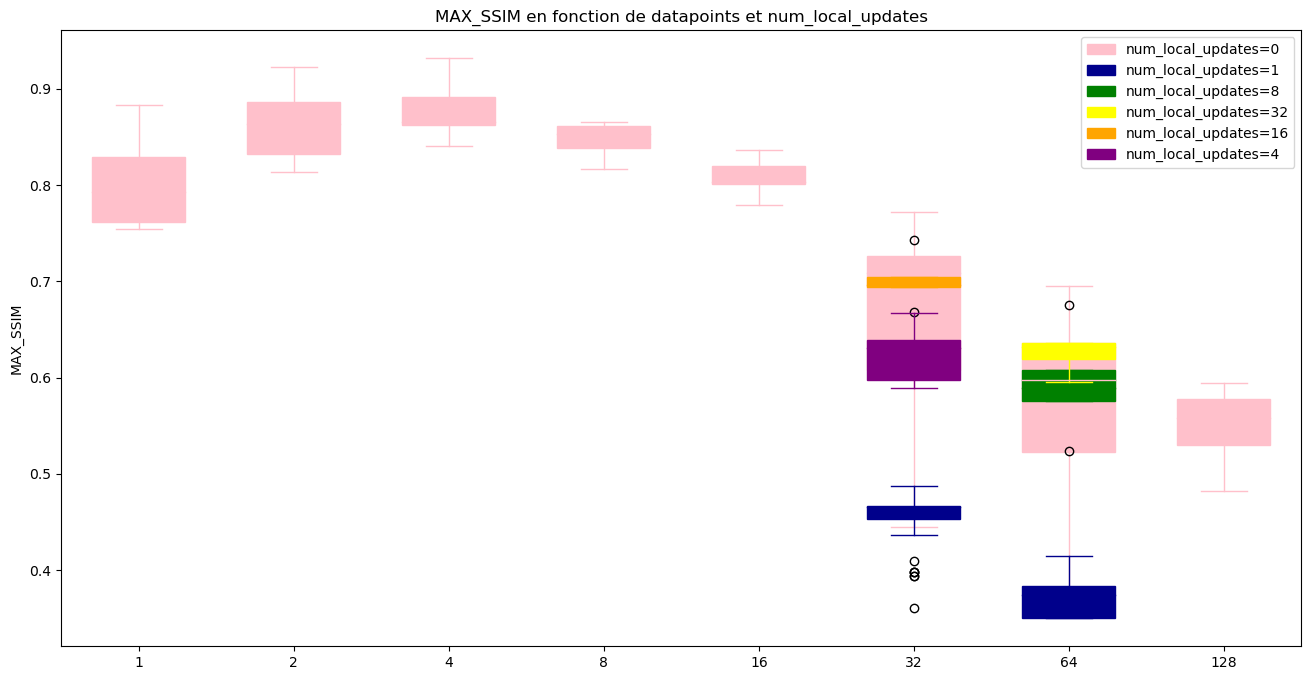

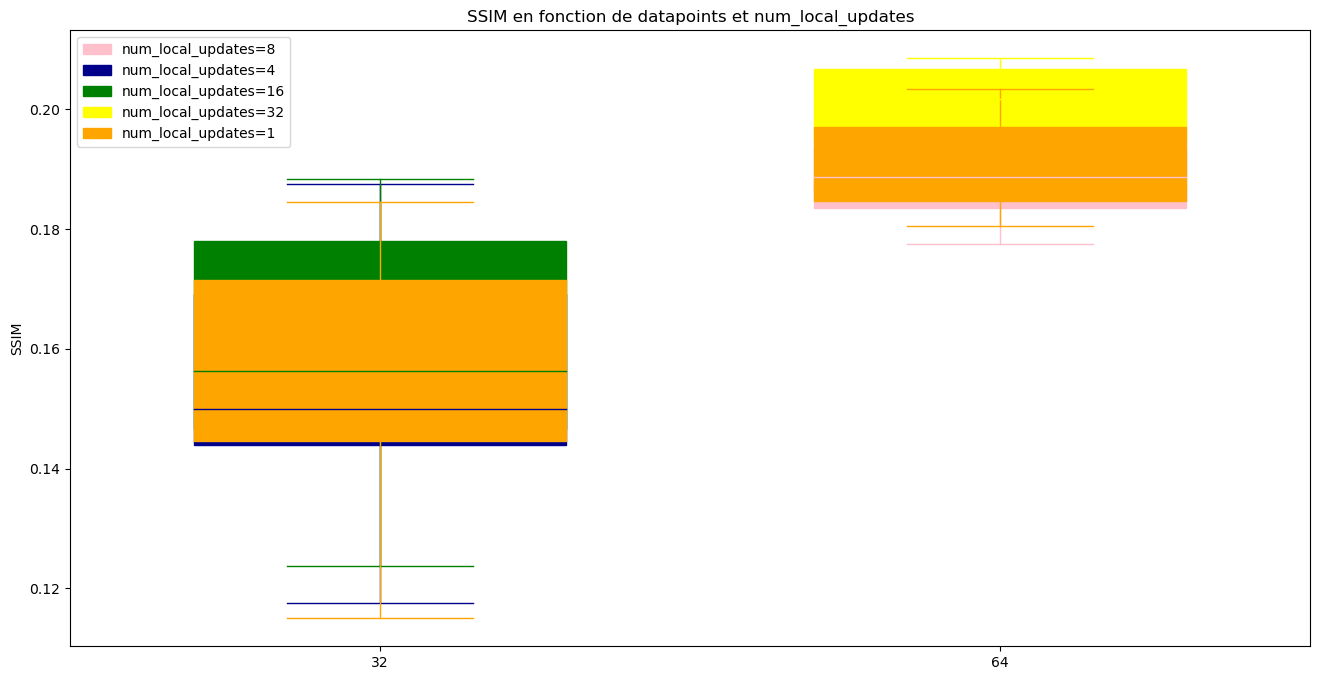

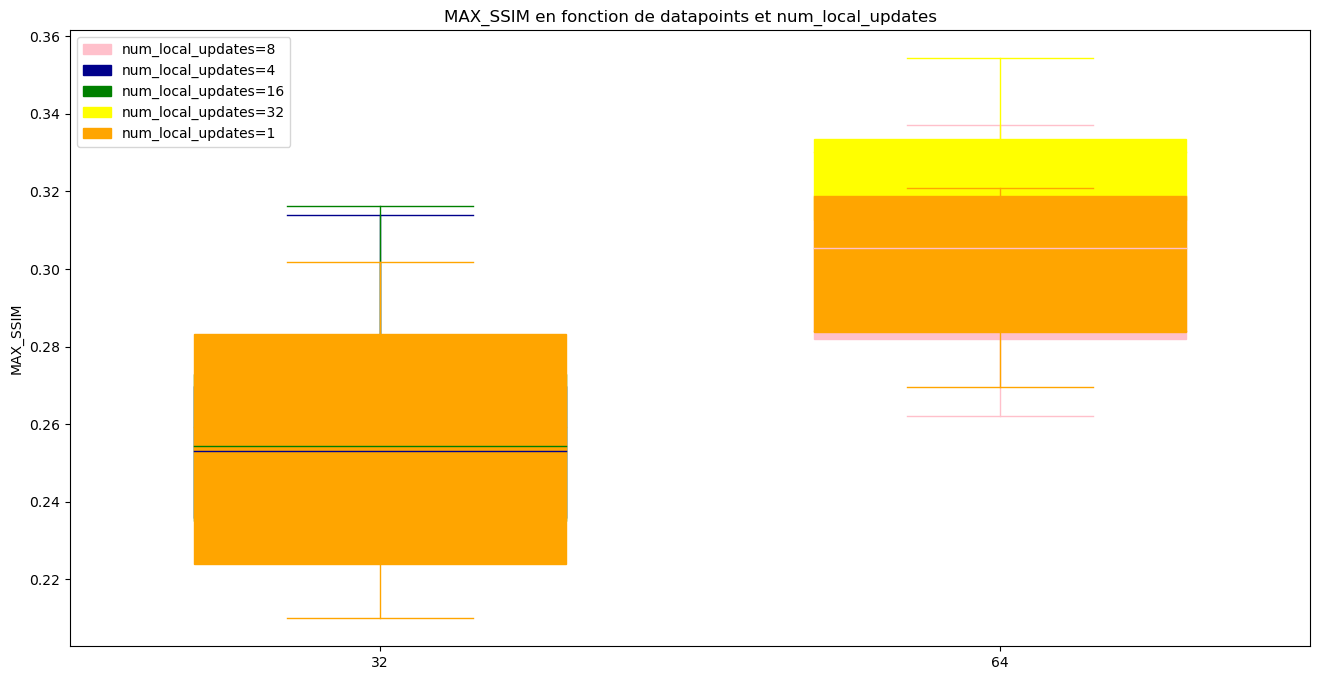

In [72]:
print("datapoints", merged_df["datapoints"].unique())
print("model", merged_df["model"].unique())
print("num_local_updates", merged_df["num_local_updates"].unique())
print("load_round", merged_df["load_round"].unique())
print("ATK_type", merged_df["ATK_type"].unique())
print("user_type", merged_df["user_type"].unique())
# merged_dfs = [merged_df]
merged_dfs = [merged_df, merged_df_1]
for i, copy_df in enumerate(merged_dfs):
    df = copy.deepcopy(copy_df)

    import matplotlib.pyplot as plt
    def box_plot(data, edge_color, fill_color, *args, **kwargs):
        bp = ax.boxplot(data, patch_artist=True, *args, **kwargs)
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color=edge_color)
        for patch in bp['boxes']:
            patch.set(facecolor=fill_color)
        return bp

    colors = ["pink", "darkblue", "green", "yellow", "orange", "purple", "red", "brown", "gray", "cyan"]

    metric_list = ["ssim", "max_ssim"]
    for metric in metric_list:
        fig, ax = plt.subplots(figsize=(16,8))
        xx = "datapoints"
        yy = "num_local_updates"
        xs = sorted(list(df[xx].unique()))
        ys = list(df[yy].unique())
        bp = []
        box = []
        positions = []
        for idx_x, x in enumerate(xs):
            for idx_y, y in enumerate(ys):
                c = colors[idx_y]
                values = df.loc[(df[xx] == x) & (df[yy] == y), metric].values
                # plt.scatter([x]*len(values), values)
                box.append(values)
                # positions.append(idx_x)
                bp.append(box_plot(
                    [values], 
                    c,
                    c,
                    positions=[idx_x], 
                    widths=0.6,
                ))
        plt.xticks(range(len(xs)), xs)
        ax.legend([bp[i]["boxes"][0] for i in range(len(ys))], [f"{yy}={y}" for y in ys])
        plt.title(f"{metric.upper()} en fonction de {xx} et {yy}")
        plt.ylabel(f"{metric.upper()}")
        plt.show()

    # analysis.plot_2d_df(filtered_df, x_axis="datapoints", y_axis=["ATK_type"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

Text(0.5, 1.0, 'SSIM of pretrained vs non-pretrained models')

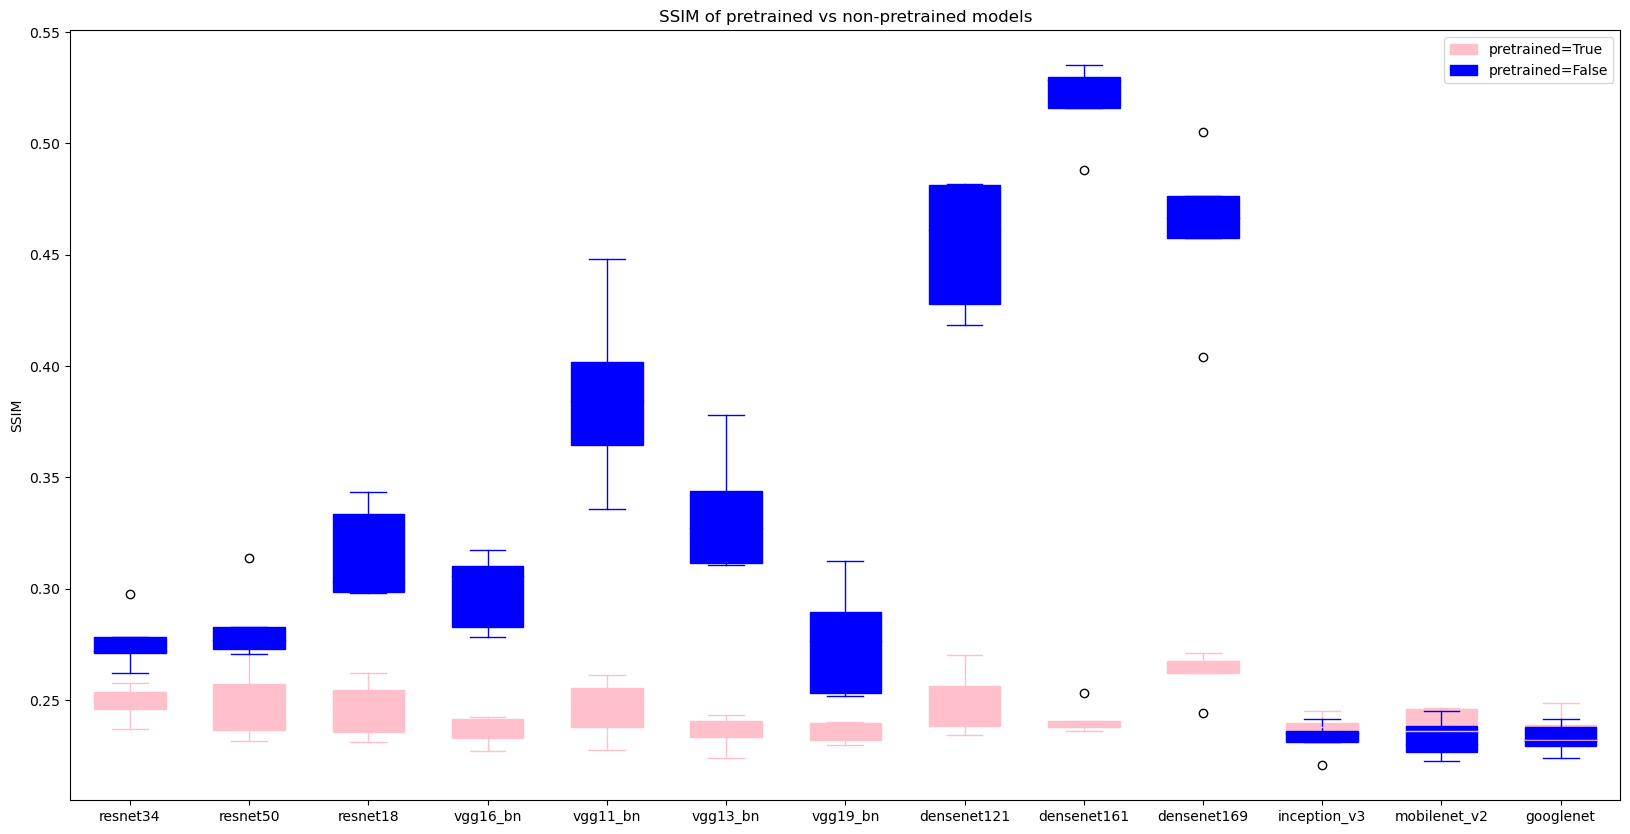

In [52]:
filtered_df_1 = copy.deepcopy(merged_df)

filtered_df_1["pretrained"] = filtered_df_1["server"].str.extract(r"'pretrained': (\w+)")
# filtered_df_1["pretrained"] = filtered_df_1["pretrained"] == "True"
# print(merged_df["num_data_points"].unique())
# filtered_df = merged_df.loc[merged_df["model"] == "custom_McMahan_32_32"]
# print(filtered_df.shape)
# print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 16]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
# filtered_df = filtered_df[(filtered_df["load_round"] == 1) | (filtered_df["load_round"] == 100)]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
# print(filtered_df["attack"].unique())
filtered_df = pd.concat([filtered_df_1, filtered_df_2])
filtered_df = filtered_df[filtered_df["model"] != "custom_McMahan_32_32"]
filtered_df["model"] = filtered_df["model"].str.replace("custom_", "")
filtered_df["model"] = filtered_df["model"].str.replace("cifar10_", "")

df = copy.deepcopy(filtered_df)
xs = df["model"].unique()
ys = df["pretrained"].unique()
colors = ["pink", "blue"]

def box_plot(data, edge_color, fill_color, *args, **kwargs):
    bp = ax.boxplot(data, patch_artist=True, *args, **kwargs)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

fig,ax = plt.subplots(figsize=(20,10))
bp = []
for idx, y in enumerate(ys):
    box = []
    c = colors[idx]
    for x in xs:
        values = df.loc[(df["model"] == x) & (df["pretrained"] == y), "ssim"].values
        # plt.scatter([x]*len(values), values)
        box.append(values)
    bp.append(box_plot(
        box, 
        c,
        c,
        positions=np.arange(len(box)), 
        widths=0.6,
    ))
ax.legend([bp[i]["boxes"][0] for i in range(len(ys))], [f"pretrained={y}" for y in ys])
plt.xticks(range(len(xxs)), xxs)
plt.ylabel("SSIM")
plt.title("SSIM of pretrained vs non-pretrained models")

# analysis.plot_2d_df(filtered_df, x_axis="model", y_axis=["pretrained"], loss_list=["max_ssim", "ssim"], metric_list=["mean"], plot_style="scatter", group_by=False)

In [2]:
from omegaconf import OmegaConf

merged_df = analysis.get_cfg_from_df(merged_df)

In [65]:
merged_df["cfg"].str.contains("14-25-55")

array([False])

In [43]:
filtered_conv_df

,restart_trial,user_idx,step,Trial_0_Val,file_path
103200,0,0,0,4.596194,/volatile/home/pj273170/Code/Breaching/breachi...
103201,0,0,1,3.396253,/volatile/home/pj273170/Code/Breaching/breachi...
103202,0,0,2,2.333208,/volatile/home/pj273170/Code/Breaching/breachi...
103203,0,0,3,1.840391,/volatile/home/pj273170/Code/Breaching/breachi...
103204,0,0,4,1.518079,/volatile/home/pj273170/Code/Breaching/breachi...
...,...,...,...,...,...
115195,0,4,2395,0.068334,/volatile/home/pj273170/Code/Breaching/breachi...
115196,0,4,2396,0.069611,/volatile/home/pj273170/Code/Breaching/breachi...
115197,0,4,2397,0.070940,/volatile/home/pj273170/Code/Breaching/breachi...
115198,0,4,2398,0.071352,/volatile/home/pj273170/Code/Breaching/breachi...


[100]


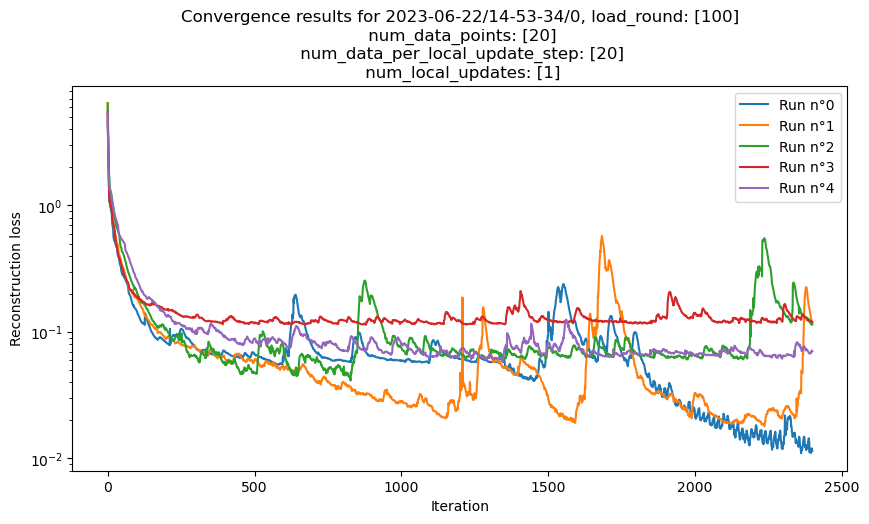

In [39]:
analysis.plot_conv_df(conv_df, date_and_run, merged_df)

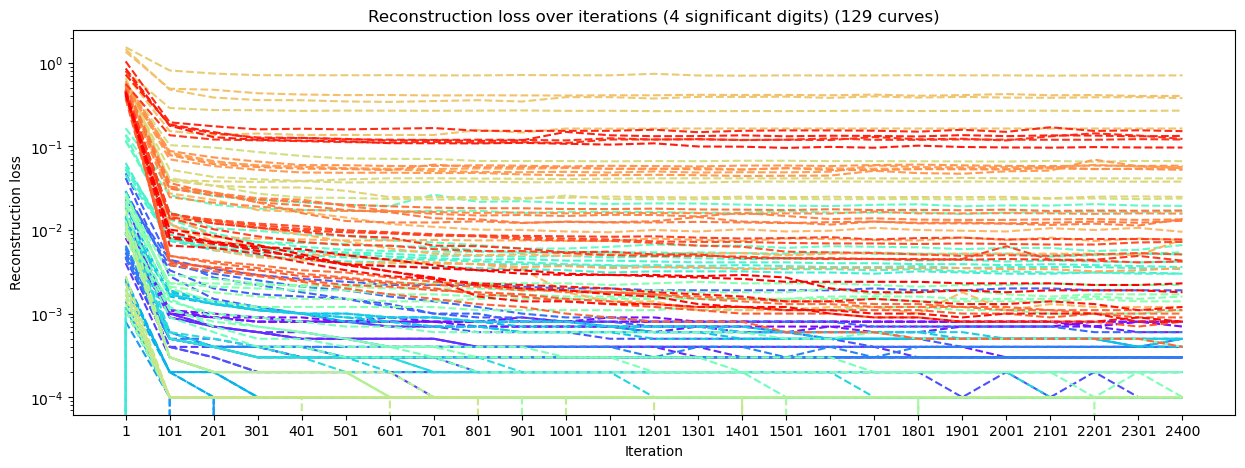

In [70]:
filtered_df = merged_df#.loc[(merged_df["num_local_updates"] == 5)]
analysis.plot_reconstruction_loss_from_df(filtered_df)
# print(reconstruction_loss)
# for i in range(len(reconstruction_loss)):
#     plt.plot(iter_values, reconstruction_loss[i], label=f"trial {i}")


In [4]:
print(merged_df.columns)
for col in merged_df.columns:
    print(f"{col:<20}, {merged_df[col].loc[0]}")
# print(merged_df["ATK_optim"].loc[0])
# print(merged_df["ATK_objective"].loc[0])
# print(merged_df["model"].loc[0])
# print(merged_df["datapoints"].loc[0])
# print(merged_df["score"].loc[0])
# print(merged_df["model_state"].loc[0])

Index(['name', 'usecase', 'model', 'datapoints', 'model_state', 'attack',
       'attacktype', 'mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'min_mse',
       'max_mse', 'max_psnr', 'max_lpips', 'max_ssim', 'max_rpsnr', 'IIP-none',
       'feat_mse', 'parameters', 'label_acc', 'queries', 'score', 'total_time',
       'user_type', 'gradient_noise', 'seed', 'ATK_type', 'ATK_attack_type',
       'ATK_label_strategy', 'ATK_text_strategy', 'ATK_token_recovery',
       'ATK_objective', 'ATK_restarts', 'ATK_init', 'ATK_normalize_gradients',
       'ATK_optim', 'ATK_augmentations', 'ATK_differentiable_augmentations',
       'ATK_regularization', 'ATK_impl', 'data', 'impl', 'server', 'user',
       'num_queries', 'folder', 'file_path', 'num_data_points',
       'num_data_per_local_update_step', 'num_local_updates', 'load_round',
       'it_1', 'it_101', 'it_201', 'it_301', 'it_401', 'it_501', 'it_601',
       'it_701', 'it_801', 'it_901', 'it_1001', 'it_1101', 'it_1201',
       'it_1301', 'it_1401',

[ 50  20 100   0]
(37, 81)
[16  8]
['deep-leakage']
model: ['custom_LeNet_fromDLG' 'VGG16' 'custom_McMahan_32_32' 'custom_ResNet18']
number of total experiment: 37
datapoints(2): [16  8]
['model'](4): ['VGG16' 'custom_LeNet_fromDLG' 'custom_McMahan_32_32' 'custom_ResNet18']
number of experiment for each (datapoints&['model']): 4.625


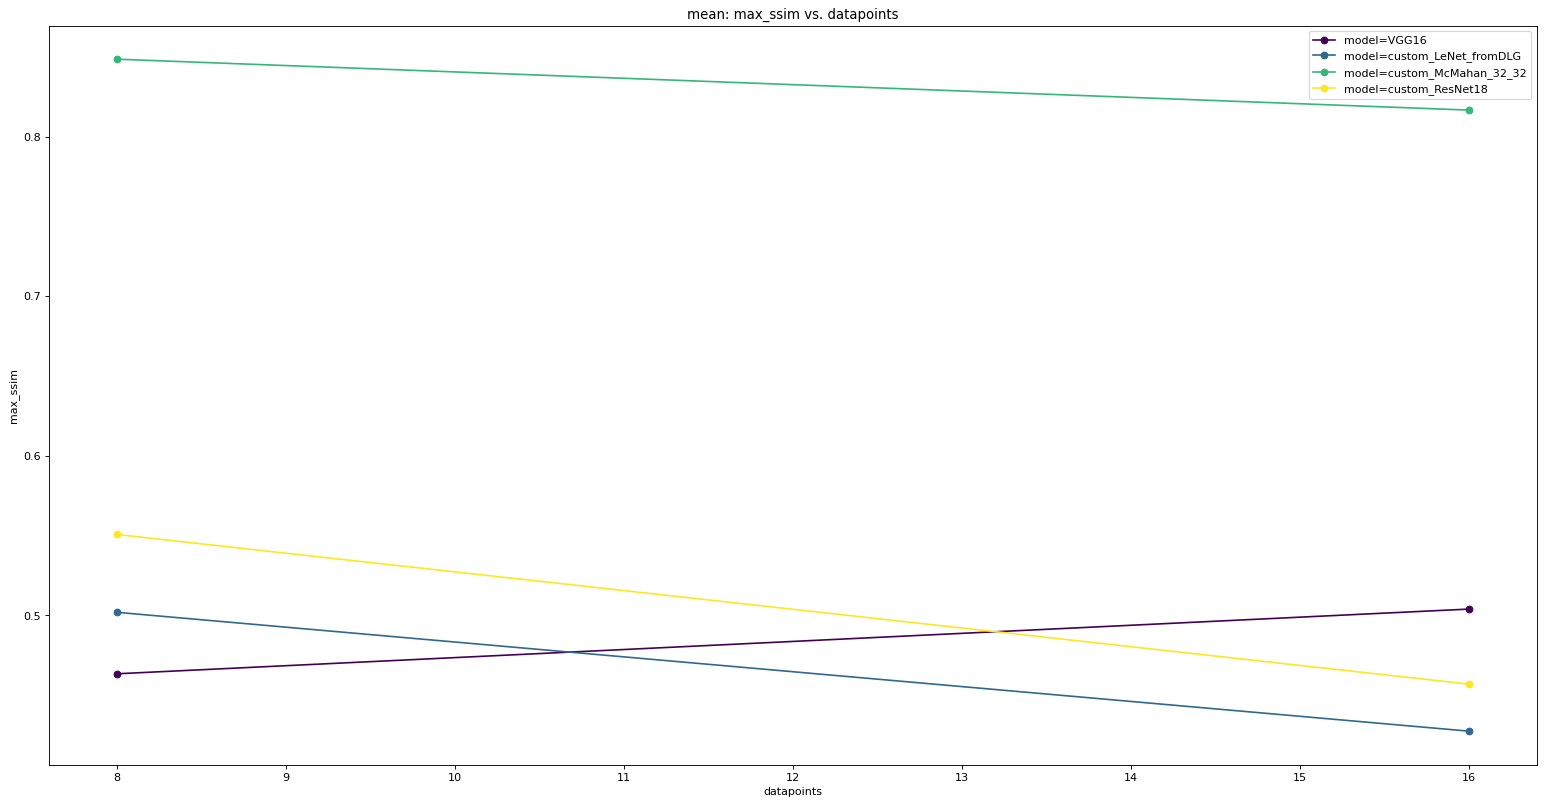

model: ['custom_LeNet_fromDLG' 'VGG16' 'custom_McMahan_32_32' 'custom_ResNet18']
number of total experiment: 37
datapoints(2): [16  8]
['model'](4): ['VGG16' 'custom_LeNet_fromDLG' 'custom_McMahan_32_32' 'custom_ResNet18']
number of experiment for each (datapoints&['model']): 4.625


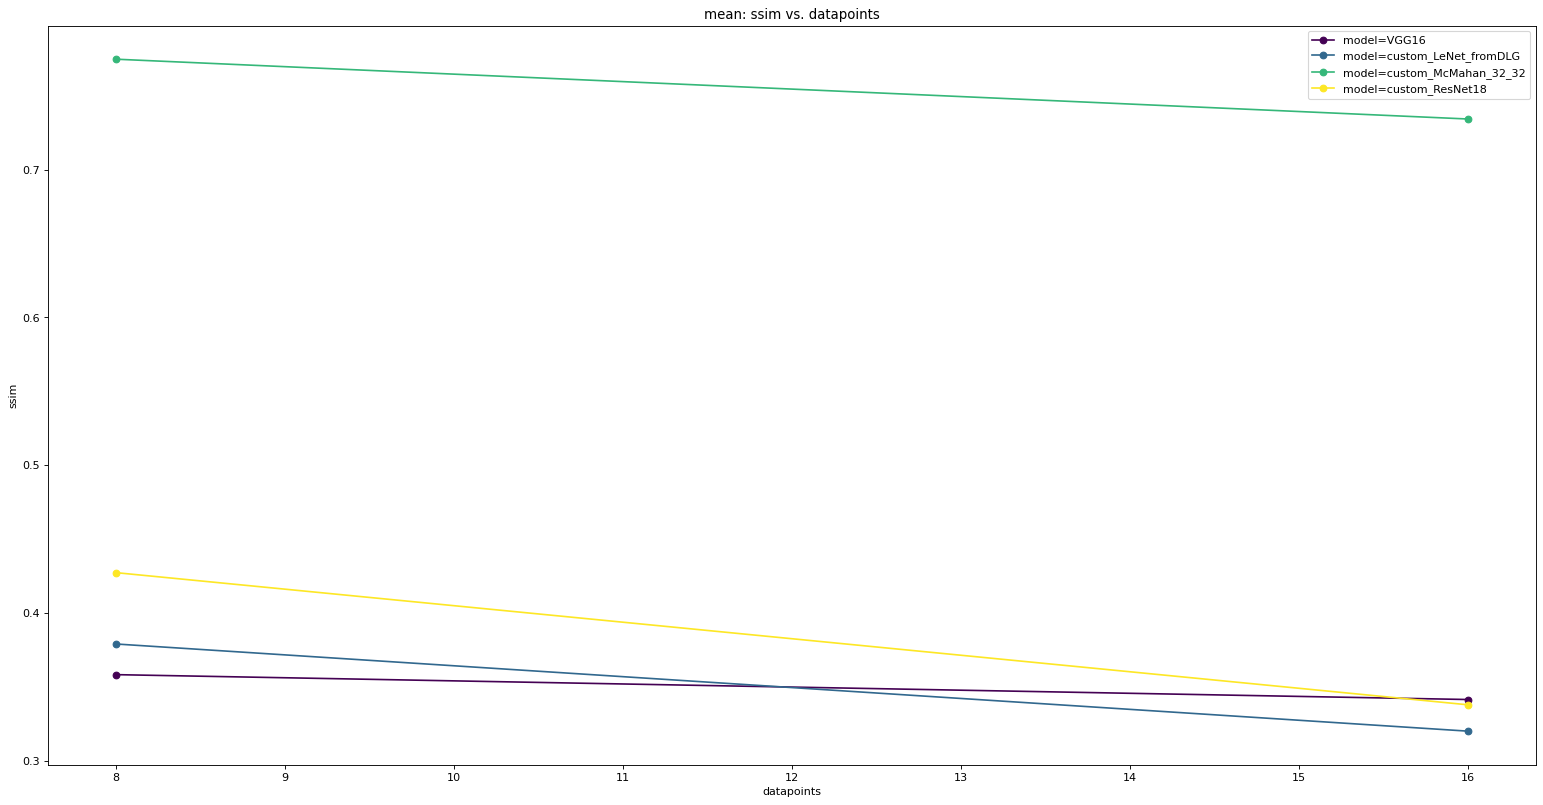

In [12]:
print(merged_df["num_data_points"].unique())
filtered_df = merged_df[merged_df["file_path"].str.contains("2023-07-19")]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 4]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, x_axis="datapoints", y_axis=["model"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

[ 50 100  20]
(212, 81)
[ 50 100  20]
['deep-leakage']
model: ['custom_McMahan_32_32']
number of total experiment: 173
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](4): [  1   2   5 100]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 14.416666666666666
model: ['custom_McMahan_32_32']
number of total experiment: 173
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](4): [  1   2   5 100]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 14.416666666666666
keyword_values_total: 12


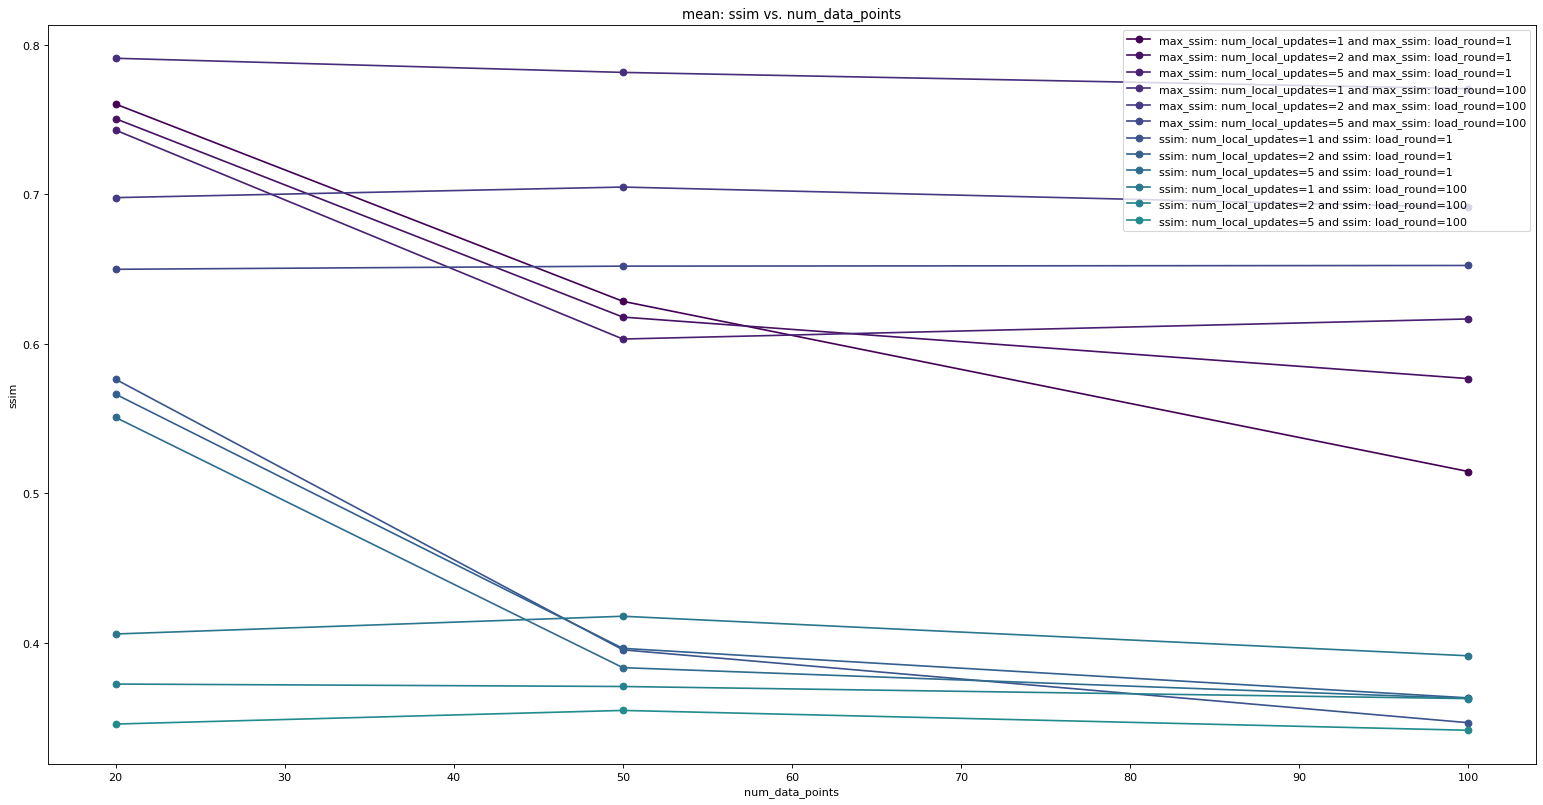

In [16]:
print(merged_df["num_data_points"].unique())
filtered_df = merged_df.loc[merged_df["model"] == "custom_McMahan_32_32"]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 4]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
filtered_df = filtered_df[(filtered_df["load_round"] == 1) | (filtered_df["load_round"] == 100)]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, x_axis="num_data_points", y_axis=["num_local_updates", "load_round"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

[ 50  20 100   0]
(222, 81)
[ 50  20 100  16   8]
['deep-leakage']
model: ['custom_McMahan_32_32']
number of total experiment: 25
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](1): [1]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 8.333333333333334


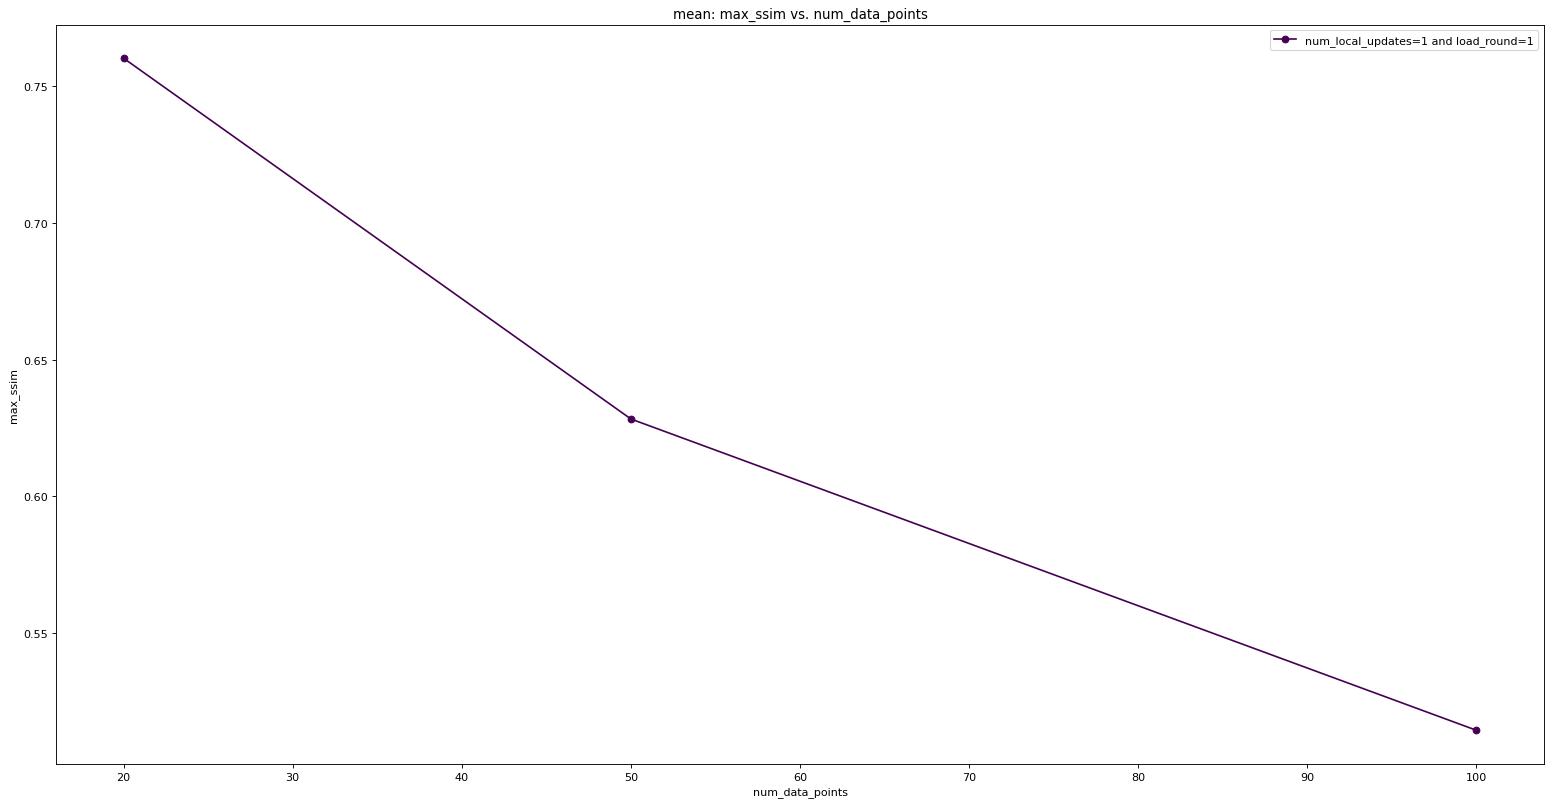

model: ['custom_McMahan_32_32']
number of total experiment: 25
num_data_points(3): [ 50  20 100]
['num_local_updates', 'load_round'](1): [1]
number of experiment for each (num_data_points&['num_local_updates', 'load_round']): 8.333333333333334


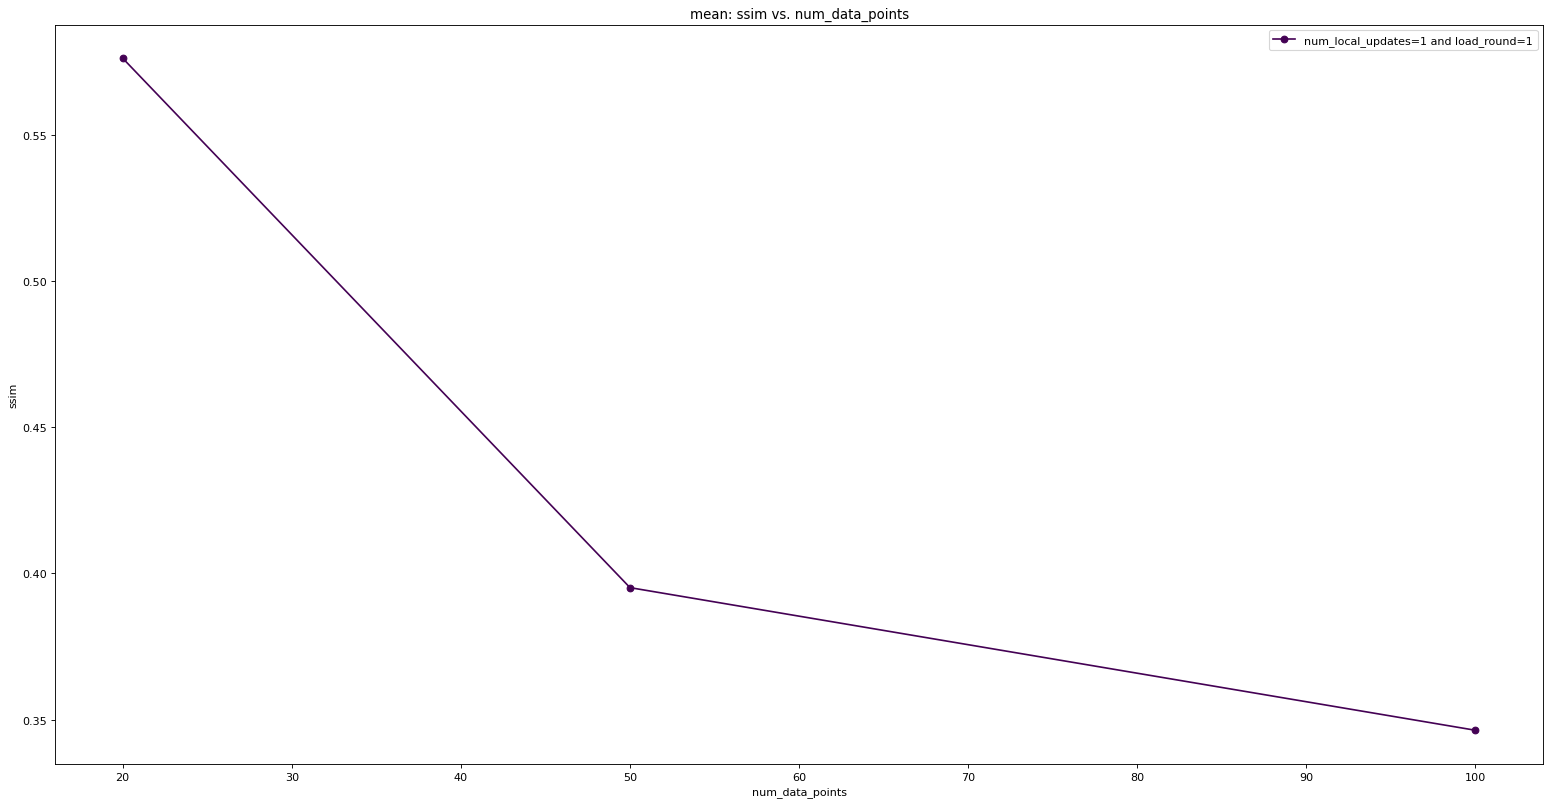

In [13]:
print(merged_df["num_data_points"].unique())
filtered_df = merged_df.loc[merged_df["model"] == "custom_McMahan_32_32"]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
# filtered_df = filtered_df[filtered_df["datapoints"] == 4]
# print(filtered_df.shape)
# filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
# print(filtered_df["mask_type"].unique())
# filtered_df = filtered_df[filtered_df[] == "random"]
filtered_df = filtered_df[(filtered_df["load_round"] == 1)]# | (filtered_df["load_round"] == 100)]
filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
# filtered_df = filtered_df[(filtered_df["num_local_updates"] == 1)]
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, x_axis="num_data_points", y_axis=["num_local_updates", "load_round"], loss_list=["max_ssim", "ssim"], metric_list=["mean"])

In [49]:
x_axis="num_data_points"
y_axis=["num_local_updates", "load_round"]
loss = "mse"
metric = ["mean", "var"]
grouped_df = filtered_df.groupby([x_axis, *y_axis])[loss].agg(metric)
# new_df = df.groupby(x_axis).apply(lambda x: pd.Series({'bc': list(zip(*y_axis))}))
print([np.unique(filtered_df[y_ax]) for y_ax in y_axis])
print([filtered_df[y_ax].unique() for y_ax in y_axis])
keyword_values = np.stack(np.meshgrid(*[np.unique(filtered_df[y_ax]) for y_ax in y_axis]), -1).reshape(-1, len(y_axis))
print(keyword_values)
print(grouped_df.index.get_level_values("num_local_updates"))

[array([1, 2, 5]), array([  1,   5, 100])]
[array([5, 2, 1]), array([  1,   5, 100])]
[[  1   1]
 [  2   1]
 [  5   1]
 [  1   5]
 [  2   5]
 [  5   5]
 [  1 100]
 [  2 100]
 [  5 100]]
Int64Index([1, 1, 1, 2, 2, 2, 5, 5, 5, 1, 1, 1, 2, 2, 2, 5, 5, 5, 1, 1, 1, 2,
            2, 2, 5, 5],
           dtype='int64', name='num_local_updates')


In [4]:
f"{0.23456789:2.4e}"

'2.3457e-01'